In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/abalone-dataset/abalone.csv


In [2]:
df = pd.read_csv('/kaggle/input/abalone-dataset/abalone.csv')

display(df.head())
print(df.shape)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


(4177, 9)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


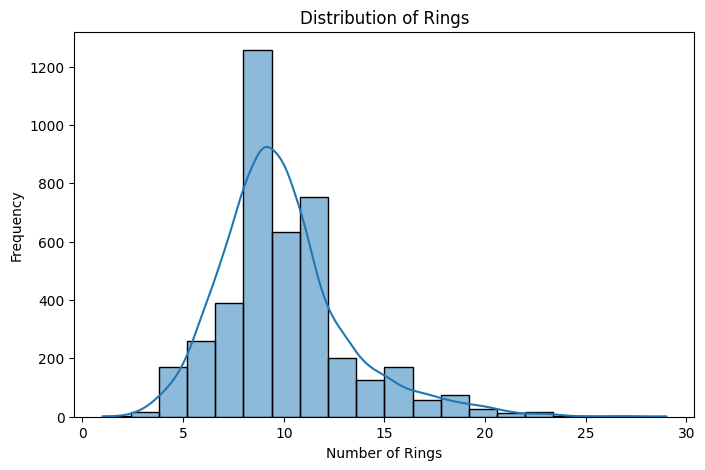

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Rings'], bins=20, kde=True)
plt.xlabel("Number of Rings")
plt.ylabel("Frequency")
plt.title("Distribution of Rings")
plt.show()

In [4]:
temp = pd.get_dummies(df['Sex']).astype(int)
df.drop(['Sex'], axis=1, inplace=True)
df = pd.concat([temp, df], axis=1)
display(df.head())

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


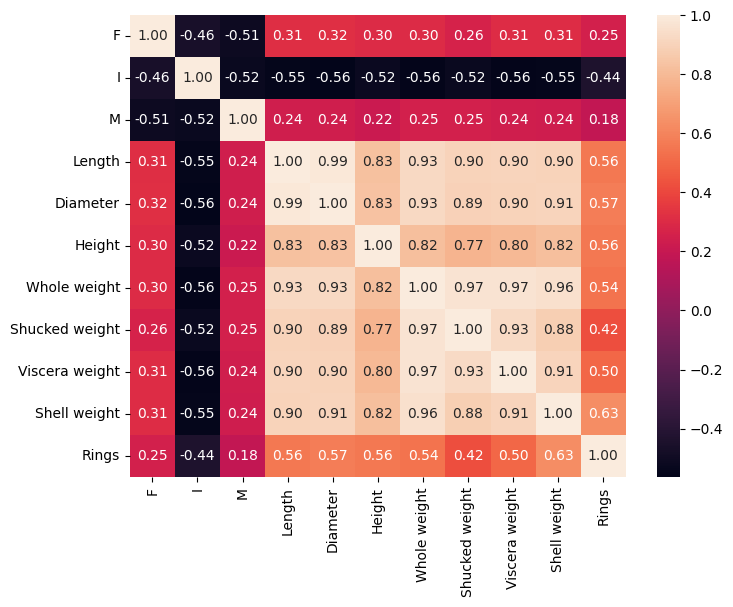

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

df.drop(columns=['F'], inplace=True)
volume = df.pop('Length') * df.pop('Height') * df.pop('Diameter')
df = df[volume != 0]
volume = volume[volume != 0]

X = df.drop(columns=['Rings'], axis=1)
y = df['Rings']
X['Density'] = df.pop('Whole weight') / volume
display(X.head())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

,I,M,Whole weight,Shucked weight,Viscera weight,Shell weight,Density
0,0,1,0.5140,0.2245,0.1010,0.150,32.578813
1,0,1,0.2255,0.0995,0.0485,0.070,27.014076
2,0,0,0.6770,0.2565,0.1415,0.210,22.528368
3,0,1,0.5160,0.2155,0.1140,0.155,25.703611
4,1,0,0.2050,0.0895,0.0395,0.055,30.451575


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [8]:
import tensorflow as tf

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(32, activation='relu'),
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(16, activation='relu'),
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1, activation='linear')
    ])

    model.compile(
        optimizer='adam', 
        loss='mse', 
        metrics=['mae']
    )
    
    return model

In [9]:
model1 = create_model()

history = model1.fit(
    X_train, y_train, 
    validation_split=0.2, 
    epochs=50, 
    batch_size=64
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 104.8481 - mae: 9.8273 - val_loss: 102.7220 - val_mae: 9.6308
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 97.2772 - mae: 9.5856 - val_loss: 90.1017 - val_mae: 8.9834
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87.0271 - mae: 9.1020 - val_loss: 79.5583 - val_mae: 8.4114
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79.0045 - mae: 8.6305 - val_loss: 69.5045 - val_mae: 7.8384
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 72.3628 - mae: 8.2289 - val_loss: 58.6409 - val_mae: 7.1429
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.0520 - mae: 7.4056 - val_loss: 48.3468 - val_mae: 6.4171
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.2224 - mae: 6.7676 - val_loss: 37.8280 - val_mae: 5.6002
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.9176 - mae: 5.9018 - val_loss: 29.0303 - val_mae: 4.7736
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.4263

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model1.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R² Score: {r2}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MAE: 1.4107688464090495, MSE: 4.284769747418815, R² Score: 0.5681750776078145


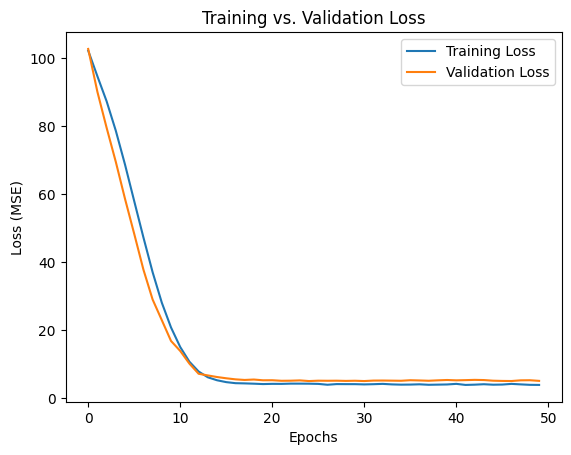

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()